In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
print("TensorFlow version:", tf.__version__)
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Seborn version:", sns.__version__)
print("Matplotlib version:", matplotlib.__version__)

2024-01-13 12:47:07.034190: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-13 12:47:07.703040: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-01-13 12:47:07.703098: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-01-13 12:47:07.808776: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-13 12:47:10.220469: W tensorflow/stream_executor/platform/de

TensorFlow version: 2.10.0
NumPy version: 1.21.5
Pandas version: 1.3.5
Seborn version: 0.12.0
Matplotlib version: 3.5.1


In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

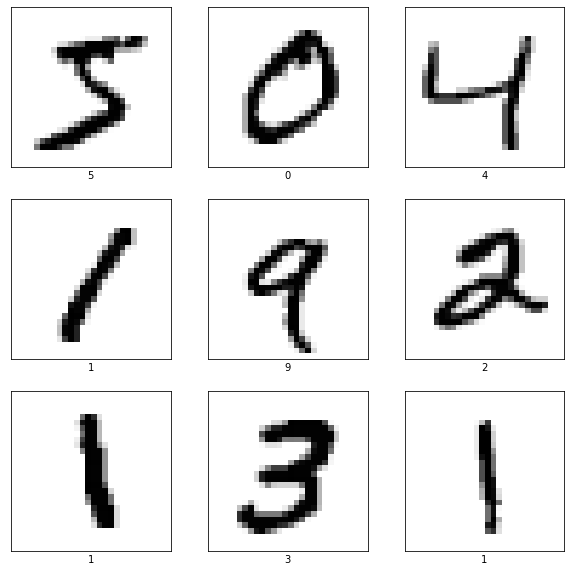

In [3]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()


In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=3, activation='relu', input_shape=[28,28,1]),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax', use_bias=False)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

2024-01-13 12:47:15.554775: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-01-13 12:47:15.555528: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-01-13 12:47:15.555591: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (laptop): /proc/driver/nvidia/version does not exist
2024-01-13 12:47:15.556529: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5


/home/valeriy/.local/lib/python3.10/site-packages/keras/backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 27s 14ms/step - loss: 0.5167 - accuracy: 0.9258
Epoch 2/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0855 - accuracy: 0.9751
Epoch 3/5
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0638 - accuracy: 0.9809
Epoch 4/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0522 - accuracy: 0.9840
Epoch 5/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0466 - accuracy: 0.9861


In [6]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.0640 - accuracy: 0.9823 - 2s/epoch - 6ms/step

Test accuracy: 0.9822999835014343


In [7]:
print(y_test[42])
model.predict(np.array([x_test[42]]), verbose=0)


4


array([[1.6648194e-12, 3.2942847e-08, 1.1107858e-14, 3.1804948e-11,
        9.9998760e-01, 7.1602311e-09, 3.5869523e-11, 4.4388138e-09,
        6.2742540e-09, 1.2392241e-05]], dtype=float32)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 10)                8

In [9]:
model.save('my_model.keras')